In [14]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import os, shutil

In [15]:
from utils.data_loader import fetch_yf_stock_data, add_technical_indicator

In [33]:
ticker = 'QUBT'

In [34]:
df_cur = fetch_yf_stock_data(ticker, interval='15m', period='60d', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [35]:
pricefile = f"./data/{ticker}15m_yfprice.csv"
if os.path.isfile(pricefile):
    df_last = pd.read_csv(pricefile, index_col=0)
    df_last.index = pd.to_datetime(df_last.index).strftime("%Y-%m-%d %H:%M:%S")
    df_last.reset_index(inplace=True)
    last_day = df_last['Datetime'].iloc[0]
    df_last.to_csv(f"./data/{ticker}T15m_yfprice_{last_day.replace('-', '').replace(' ', '').replace(':', '')}.csv", index=False)
else:
    df_last = pd.DataFrame()
    last_day = df_cur.index[-1]
last_day

'2025-05-23 19:45:00'

In [36]:
df_cur.reset_index(inplace=True)
last_day_idx = df_cur['Datetime'].to_list().index(last_day)
df_cur = df_cur.iloc[:last_day_idx]
if len(df_cur) == 0:
    df_new = df_last
else:
    df_new = pd.concat([df_cur, df_last], ignore_index=False)
df_new.index = df_new['Datetime']
df_final = df_new.drop(['Datetime'], axis=1)
df_final.head()

,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,
2025-05-23 19:45:00,13.3000,13.3000,13.7500,13.220,13.7350,2572355
2025-05-23 19:30:00,13.7350,13.7350,13.7600,13.555,13.5678,1352151
2025-05-23 19:15:00,13.5700,13.5700,13.9400,13.490,13.9300,1578661
2025-05-23 19:00:00,13.9399,13.9399,13.9650,13.605,13.6400,2040540
2025-05-23 18:45:00,13.6330,13.6330,13.6702,13.460,13.5050,1128813


In [37]:
df_final.to_csv(pricefile)

In [38]:
df_ta = add_technical_indicator(df_final[::-1])
df_ta.tail()

,Adj Close,Close,High,Low,Open,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,...,MACD_signal,MACD_diff,MACDD_sign,MACDD_sign_shift,MACDD_sign_signal,WilliamsR,WilliamsR_signal,sma50,sma200,sma_signal
Datetime,,,,,,,,,,,,,,,,,,,,,
2025-05-23 18:45:00,13.6330,13.6330,13.6702,13.460,13.5050,1128813,13.570410,14.382333,12.758487,0.0,...,0.433446,-0.060122,-1,-1.0,0,-47.642825,0,12.472488,11.284441,1
2025-05-23 19:00:00,13.9399,13.9399,13.9650,13.605,13.6400,2040540,13.639405,14.320064,12.958746,0.0,...,0.420724,-0.050887,-1,-1.0,0,-25.721403,0,12.539386,11.308891,1
2025-05-23 19:15:00,13.5700,13.5700,13.9400,13.490,13.9300,1578661,13.650145,14.319207,12.981083,0.0,...,0.403256,-0.069874,-1,-1.0,0,-52.273555,0,12.599586,11.331915,1
2025-05-23 19:30:00,13.7350,13.7350,13.7600,13.555,13.5678,1352151,13.649395,14.318041,12.980749,0.0,...,0.385441,-0.071257,-1,-1.0,0,-41.013404,0,12.666186,11.355615,1
2025-05-23 19:45:00,13.3000,13.3000,13.7500,13.220,13.7350,2572355,13.613395,14.275852,12.950938,0.0,...,0.360525,-0.099664,-1,-1.0,0,-82.304516,-1,12.711986,11.376340,1


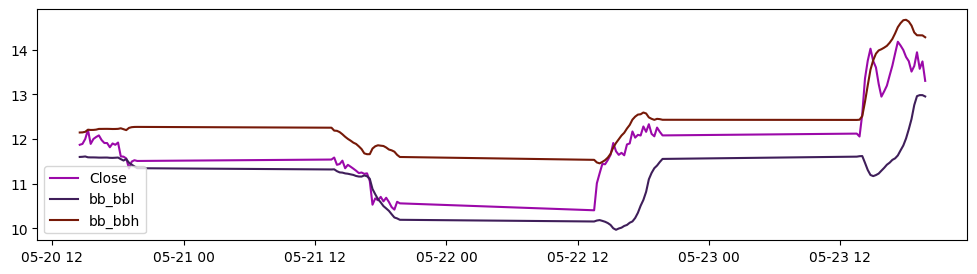

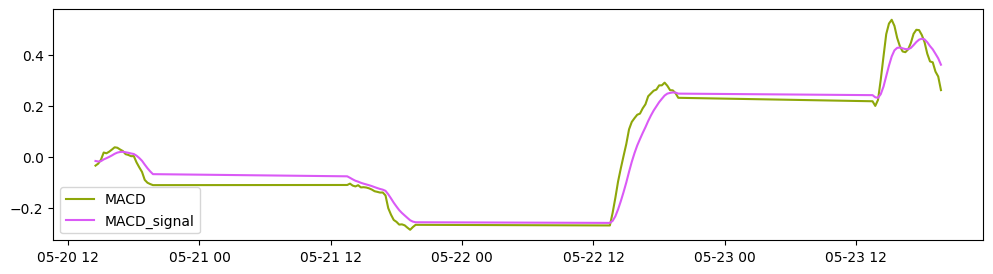

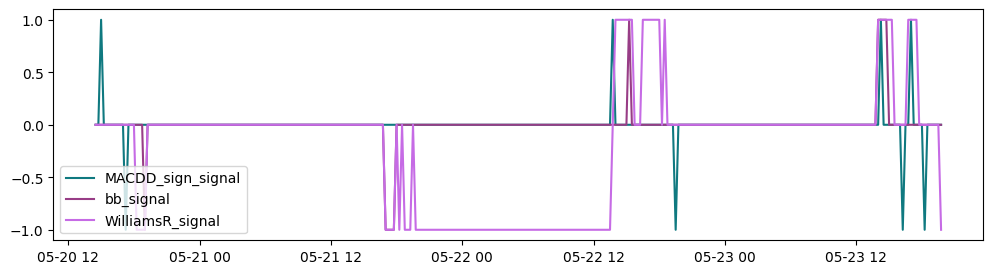

In [41]:
st_idx = -100
plot_lines(df_ta, ['Close','bb_bbl','bb_bbh'], st_idx)
plot_lines(df_ta, ['MACD','MACD_signal'], st_idx)
plot_lines(df_ta, ['MACDD_sign_signal','bb_signal', 'WilliamsR_signal'], st_idx)